# **Procesamiento de Lenguaje Natural**

## Maestría en Inteligencia Artificial Aplicada
#### Tecnológico de Monterrey
#### Prof Luis Eduardo Falcón Morales

### **Actividad en Equipos Semanas 7 y 8 : LDA y LMM audio-a-texto**

# <font color="red">**Equipo 8**</font>

**Nombres y matrículas:**

*   <font color="orange">**A01749448**</font> Jorge Chávez Badillo
*   <font color="orange">**A01795690**</font> Michelle Alejandro Durán Sánchez
*   <font color="orange">**A01796362**</font> Eduardo Pérez Carrillo
*   <font color="orange">**A01795907**</font> Nancy Teresa Zapién García




* ##### **En cada ejercicio pueden importar los paquetes o librerías que requieran.**

* ##### **En cada ejercicio pueden incluir las celdas y líneas de código que deseen.**

---

# **Ejercicio 1:**

* #### **Liga de los audios de las fábulas de Esopo:** https://www.gutenberg.org/ebooks/21144

* #### **Descargar los 10 archivos de audio solicitados: 1, 4, 5, 6, 14, 22, 24, 25, 26, 27.**



### <font color="orange">**Instalaciones**</font>

se instala **pydud** para la lectura de archivos MP3

In [1]:
pip install pydub

You should consider upgrading via the 'c:\Users\michd\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### <font color="orange">**Importación de librerias**</font>

In [2]:
#cargar audios
from pydub import AudioSegment
#acceso a carpeta
import os
from pydub.utils import which
print(which("ffmpeg"))
print(which("ffprobe"))
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\ffmpeg\bin\ffmpeg.exe
C:\ffmpeg\bin\ffprobe.exe


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

### <font color="orange">**Descarga de archivos de audio 1, 4, 5, 6, 14, 22, 24, 25, 26, 27**</font>

In [4]:
#Ruta donde se localizan los audios
ruta_audios = "C:\\Users\\michd\\OneDrive\\Escritorio\\Maestría\\Materias\\NLP\\Actividad 3\\Audios"
print(os.listdir(ruta_audios))  # See if files are listed properly

#Carga audios en lista
audios = [AudioSegment.from_mp3(os.path.join(ruta_audios, f)) for f in sorted(os.listdir(ruta_audios)) if f.endswith(".mp3")]

#para verificar
print(f"Se cargaron {len(audios)} audios.")

['21144-01.mp3', '21144-04.mp3', '21144-05.mp3', '21144-06.mp3', '21144-14.mp3', '21144-22.mp3', '21144-24.mp3', '21144-25.mp3', '21144-26.mp3', '21144-27.mp3']
Se cargaron 10 audios.


----

# **Ejercicio 2a:**

* #### **Comenten el por qué del modelo seleccionado para extracción del texto de los audios.**

* #### **Extraer el contenido de los audios en texto.**

* #### **Sugerencia:** pueden extraerlo en un formato de diccionario, clave:valor $→$ {audio01:fabula01, ...}

# **Modelo Whisper de OpenAI con HuggingFace**

### <font color="orange">**Instalaciones**</font>

Para usar HuggingFace

In [5]:
pip install transformers datasets torchaudio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\michd\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


----

Para optimizar y simplificar el entrenamiento del modelo en CPU

In [6]:
pip install accelerate

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\michd\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### <font color="orange">**Importación de librerias**</font>

In [7]:
import torch
print("PyTorch versión:", torch.__version__)
print("GPU disponible:", torch.cuda.is_available())

from transformers import pipeline

PyTorch versión: 2.7.1+cpu
GPU disponible: False


### <font color="orange">**Extraccion contenido de audios**</font>

En este segmento de codigo se almacenan los audios en una carpeta para posteriormente guardar los resultados en un el diccionario haciendo uso de Whisper

In [8]:
#Carga modelo Whisper desde HuggingFace
transcriber = pipeline("automatic-speech-recognition", model="openai/whisper-base",
                       device=-1,  # 0 con GPU / -1 sin usar GPU
                       return_timestamps=True
                       )

#Diccionario (Almacenara los resultados)
transcripciones = {}

#Iteracion
for archivo in sorted(os.listdir(ruta_audios)):
    if archivo.endswith(".mp3"):
        ruta = os.path.join(ruta_audios, archivo)
        clave = os.path.splitext(archivo)[0]  #Nombre del archivo sin la extensión

        print(f"Transcribiendo: {archivo}...")
        resultado = transcriber(ruta)

        #Extrae el texto de los segmentos
        texto = " ".join([seg["text"] for seg in resultado["chunks"]])
        transcripciones[clave] = texto

#Visualizar resultados
print("\n\nVisualización del contenido de los audios")
for clave, texto in transcripciones.items():
    print("--------------------------------------------------------------------")
    print(f"{clave}:\n {texto}")
    print("\n")

Device set to use cpu
c:\Users\michd\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\whisper\generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


Transcribiendo: 21144-01.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-04.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-05.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-06.mp3...
Transcribiendo: 21144-14.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-22.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-24.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-25.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-26.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribiendo: 21144-27.mp3...


Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.




Visualización del contenido de los audios
--------------------------------------------------------------------
21144-01:
  Las fábulas de sopo, grabado para librebox.org por paulino, www.paulino.info.  Fábula número 61, el lobo y el cordero en el templo.  Tando se cuenta de que era perseguido por un lobo,   un pequeño cordelito decidió refugiarse en un templo cercano. Lo llamó lobo y le dijo que si el sacrificador lo encontraba allí adentro lo emolaría a su Dios. Mejor así replicó el  cordero, prefiero ser víctima para un Dios a tener que perecer en tus colmillos. Si sin remedio   vamos a ser sacrificados, más nos vale que sea con el mayor honor, fin de la fábula.  Esta es una grabación del dominio público.


--------------------------------------------------------------------
21144-04:
  Las fábulas de sopo grabado para libreboats.org por Roberto Antonio Muñoz,  fábula número 64, el logo y la cruza.  A un lobo que comía un hueso se le atragantó el hueso en la garganta y corría por t

# **Ejercicio 2b:**

* #### **Eliminar el inicio y final comunes de los textos extraídos de cada fábula.**

* #### **Sugerencia:** Pueden guardar esta información en un archivo tipo JSON, para que al estar probando diferentes opciones en los ejercicios siguientes, puedan recuperar rápidamente la información de cada video/fábula.

### <font color="orange">**Importación de librerias**</font>

In [9]:
#Expresiones regulares
import re
#Formato JSON
import json
import unicodedata

### <font color="orange">**Función para limpieza**</font>

El siguiente código tiene como propósito limpiar y estandarizar el texto transcrito de audios de fábulas, eliminando partes que no forman parte del contenido principal, como introducciones automáticas o frases de cierre.

Elimina de forma automática los fragmentos como:

- “Las fábulas de Esopo...”
- “De la fábula, esta grabación es dominio público”

La función `normalizar_texto(texto)`:

- Quita acentos utilizando `unicodedata.normalize`.
- Elimina caracteres especiales no alfabéticos.
- Convierte el texto a minúsculas.
- Reemplaza múltiples espacios por uno solo.
- Elimina espacios sobrantes al inicio y final.

La función `limpiar_texto(texto)`:

- Elimina todo lo que está antes de frases como “número 123”.
- Elimina repeticiones como “no, no, no...” si se repite muchas veces.
- Elimina diferentes versiones de la frase “de la fábula esta grabación es dominio público”.

| Símbolo / Método            | Descripción                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `re.sub(patrón, '', texto)` | Reemplaza texto que coincide con un patrón de expresión regular             |
| `^`                         | Indica el inicio de una línea                                               |
| `.*?`                       | Coincide con cualquier texto (modo no codicioso)                           |
| `\d+`                       | Coincide con uno o más dígitos                                              |
| `\s*`                       | Coincide con cero o más espacios en blanco                                 |
| `[^\w\s]`                   | Coincide con todo lo que no sea letra, número o espacio                     |
| `\b`                        | Indica límite de palabra                                                    |
| `.strip()`                  | Elimina espacios al inicio y final del texto                                |

Después de aplicar estas funciones, el texto queda limpio, normalizado y sin frases innecesarias de introducción o cierre.


In [10]:
def normalizar_texto(texto):
  # Quitar acentos
  texto = unicodedata.normalize('NFD', texto)
  texto = texto.encode('ascii', 'ignore').decode('utf-8')

  # Eliminar signos de puntuación y símbolos
  texto = re.sub(r'[^\w\s]', '', texto)

  # Convertir a minúsculas
  texto = texto.lower()

  # Reemplazar múltiples espacios por uno
  texto = re.sub(r'\s+', ' ', texto).strip()

  return texto

def limpiar_texto(texto):
    # Normalizar el texto primero
    texto = normalizar_texto(texto)

    # Eliminar desde el inicio hasta "numero <número> "
    texto = re.sub(r'^.*?numero \d+\s*', '', texto)

    # Eliminar repeticiones largas de "no, no, no..." u otros ruidos al final
    texto = re.sub(r"(no[,.\s]*){5,}", "", texto)

    # Eliminar desde "fin de" o "din de" (variantes) hasta el final
    texto = re.sub(r'\b(?:fin|din|finde)\s*(?:de\s*(?:la\s*)?(?:fa[bp]u?la|fabola|faula|fagula|tabula|fabula))?.*', '', texto)
    texto = re.sub(r'(fin|din|finde)?\s*(de)?\s*(la)?\s*f[aá]b[uú]l[ae]?\s*(esta)?\s*g?ra?va?ci[oó]n\s*(es)?\s*(de)?\s*dominio\s*publico', '', texto)
    texto = re.sub(r'(?:de\s+)?la?\s*f[aá]bula\s+esta\s+gr(a|á)vaci[oó]n\s+es\s+(del?\s+)?dominio\s+publico', '', texto)
    texto = texto.replace("de la fabula esta grabacion es dominio publico", "")
    texto = texto.replace("de la fabula esta grabacion es del dominio publico", "")
    texto = texto.replace("de fabula esta grabacion es de dominio publico", "")

    return texto

### <font color="orange">**Guardar en JSON**</font>

In [11]:
#Diccionario
  #Limpia transcripcciones y las guarda en nuevo Dicionario
transcripciones_limpias = {clave: limpiar_texto(texto) for clave, texto in transcripciones.items()}

#Ruta donde se guardara nueva transcripcion
ruta_guardado = r"C:\Users\michd\Downloads\transcripciones.json"



#Abrir archivo modo escritura "w", codificacion UTF-8 (soporta acentos, ñ, entre otros)
with open(ruta_guardado, "w", encoding="utf-8") as f:

    #formato JSON
    json.dump(transcripciones_limpias, f, indent=2, ensure_ascii=False)

#Confirma JSON guardado
print(f"Transcripciones limpias guardadas en: {ruta_guardado}")

Transcripciones limpias guardadas en: C:\Users\michd\Downloads\transcripciones.json


# **Ejercicio 3:**

* #### **Apliquen el proceso de limpieza que consideren adecuado.**

* #### **Justifiquen los pasos de limpieza utilizados. Tomen en cuenta que el texto extraído de cada fábula es relativamente pequeño.**

* #### **En caso de que decidan no aplicar esta etapa de limpieza, deberán justificarlo.**

### <font color="orange">**Justificación**</font>

Se decidió realizar dos procesos de limpieza.

Tokenización:
Divide el texto en unidades más pequeñas llamadas tokens (generalmente palabras). Esto es fundamental porque la mayoría de los algoritmos de procesamiento de lenguaje natural (NLP), como LDA, trabajan a nivel de tokens para analizar la frecuencia, coocurrencia y relación entre palabras. Sin tokenización, el modelo no podría identificar las palabras individuales que forman el contenido del texto.

Eliminación de stopwords:
Las stopwords son palabras muy comunes (como “el”, “la”, “y”, “de”) que aportan poco o ningún valor semántico para el análisis temático o de contenido. Eliminarlas reduce el ruido en los datos y ayuda a que los modelos se enfoquen en palabras que realmente aportan significado y contexto al texto. Esto mejora la calidad y relevancia de las palabras clave que extrae el modelo.

### <font color="orange">**Importación de librerias**</font>

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\michd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\michd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\michd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\michd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### <font color="orange">**Tokenización y Stopwords**</font>

In [13]:
# Incluyan a continuación todas las celdas (de código o texto) que deseen...

ruta_guardado = r"C:\Users\michd\Downloads\transcripciones.json"


# Cargar JSON
with open(ruta_guardado, 'r', encoding='utf-8') as f:
    data = json.load(f)

stopwords_es = set(stopwords.words('spanish'))

data_tokenizada = {}

for key, texto in data.items():
    # Tokenizar texto
    tokens = word_tokenize(texto, language='spanish')

    # Filtrar stopwords y tokens no alfabéticos
    tokens_filtrados = [token for token in tokens if token.isalpha() and token not in stopwords_es]
    data_tokenizada[key] = tokens_filtrados

# data_tokenizada ahora tiene el texto tokenizado y limpio de stopwords

with open(r"C:\Users\michd\Downloads\transcripciones.json", 'w', encoding='utf-8') as f_out:
    json.dump(data_tokenizada, f_out, ensure_ascii=False, indent=2)


# **Ejercicio 4:**

### <font color="orange">**Extracción de palabras clave con LDA**</font>

In [14]:
# Cargar datos tokenizados desde el archivo JSON
with open(r"C:\Users\michd\Downloads\transcripciones.json", 'r', encoding='utf-8') as file:
    tokenized_audios = json.load(file)

print(f"Se cargaron {len(tokenized_audios)} documentos tokenizados para aplicar LDA.")

#Diccionario para almacenar los temas generados por el análisis LDA
lda_topics = {}

#Aplicar LDA a cada documento individualmente
for story_name, tokens in tokenized_audios.items():
    tokens = [tokens]  # LDA requiere una lista de documentos, incluso si es solo uno

    # Crear diccionario de términos
    term_dictionary = corpora.Dictionary(tokens)

    #Convertir texto a representación Bag of Words (BOW)
    bow_corpus = [term_dictionary.doc2bow(doc) for doc in tokens]

    # Entrenar modelo LDA con un único tema
    lda_model = LdaModel(corpus=bow_corpus, num_topics=1, id2word=term_dictionary, passes=100)

    #Obtener las 20 palabras más representativas del tema
    key_terms = lda_model.show_topics(num_words=30)

    #Guardar los términos como una cadena en el diccionario de resultados
    lda_topics[story_name] = key_terms[0][1]

# Visualizar los resultados en formato tabular
for story_name, topic in lda_topics.items():
    print(f'\n Para la historia \033[1;35m{story_name}\033[0m, se generaron las siguientes palabras clave:\n')

    # Extraer pares de peso-palabra usando expresiones regulares
    extracted_pairs = re.findall(r'([\d\.]+)\*"(.*?)"', topic)
    formatted_data = [(word, float(weight)) for weight, word in extracted_pairs]

    # Imprimir datos en formato de tabla con índices
    print(f"{'Índice':<8}{'Palabra':<15}{'Frecuencia'}")
    print("-" * 35)
    for i, (word, frequency) in enumerate(formatted_data, start=1):
        print(f"{i:<8}\033[36m{word:<15}\033[0m{frequency:.3f}")

Se cargaron 10 documentos tokenizados para aplicar LDA.

 Para la historia 21144-01, se generaron las siguientes palabras clave:

Índice  Palabra        Frecuencia
-----------------------------------
1       lobo           0.051
2       si             0.038
3       templo         0.038
4       cordero        0.038
5       dios           0.038
6       ser            0.038
7       adentro        0.025
8       decidio        0.025
9       emolaria       0.025
10      asi            0.025
11      perecer        0.025
12      colmillos      0.025
13      cordelito      0.025
14      cuenta         0.025
15      pequeno        0.025
16      cercano        0.025
17      perseguido     0.025
18      remedio        0.025
19      refugiarse     0.025
20      dijo           0.025
21      replico        0.025
22      sacrificador   0.025
23      sacrificados   0.025
24      tando          0.025
25      tener          0.025
26      vale           0.025
27      vamos          0.025
28      mayor    

### <font color="orange">**Guardar en JSON y graficar**</font>

Análisis LDA guardado en 'lda_topics.json'


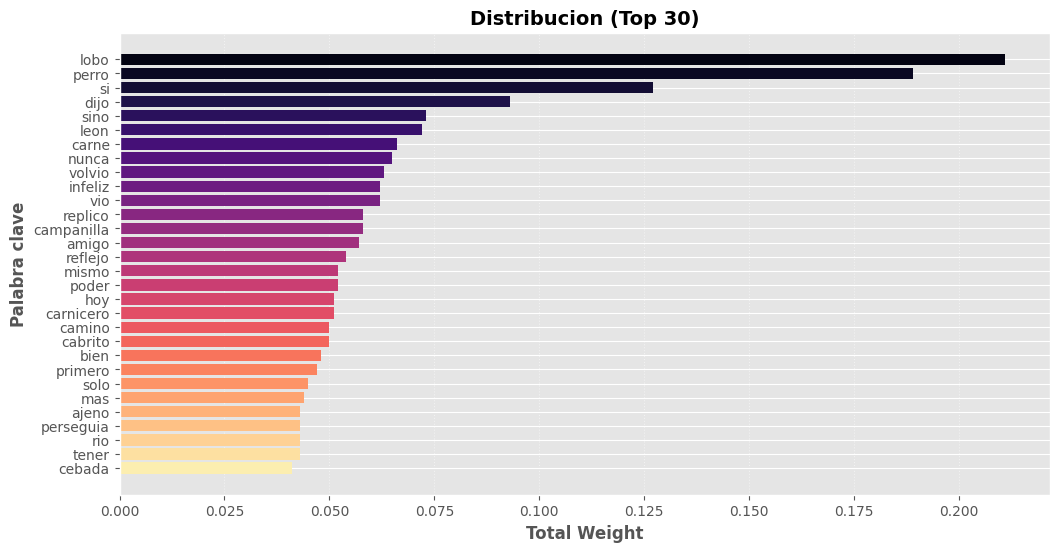

In [15]:
# Guardar el resultado del análisis LDA en un archivo JSON
with open("lda_topics.json", "w", encoding="utf-8") as output_file:
    json.dump(lda_topics, output_file, ensure_ascii=False, indent=2)

print("Análisis LDA guardado en 'lda_topics.json'")

# Convertimos los datos en una estructura tabular para análisis global
lda_data = []
for story_name, key_terms in lda_topics.items():
    # Separar los términos y sus pesos desde el formato LDA
    term_list = key_terms.split("+")
    for term_entry in term_list:
        if "*" in term_entry:
            weight, term = term_entry.strip().split("*")
            lda_data.append([story_name, term.strip('"'), float(weight)])

# Crear un DataFrame con los términos y pesos
lda_df = pd.DataFrame(lda_data, columns=["Story", "Keyword", "Weight"])

# Agrupar palabras por su peso acumulado y seleccionar las más representativas
aggregated_df = lda_df.groupby("Keyword")["Weight"].sum().reset_index()
sorted_keywords = aggregated_df.sort_values(by="Weight", ascending=False)[:30]

# Aplicar un estilo visual
plt.style.use('ggplot')  # Otros estilos: 'seaborn-darkgrid', 'seaborn-white', 'classic', 'dark_background'

# Ajustar paleta de colores y gráfico de barras
colors = sns.color_palette("magma", len(sorted_keywords))
plt.figure(figsize=(12, 6))
plt.barh(sorted_keywords["Keyword"], sorted_keywords["Weight"], color=colors)
plt.xlabel("Total Weight", fontsize=12, fontweight='bold')
plt.ylabel("Palabra clave", fontsize=12, fontweight='bold')
plt.title("Distribucion (Top 30)", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.show()

# **Ejercicio 5a y 5b:**

* #### **5a: Mediante el LLM que hayan seleccionado, generar un único enunciado que describa o resuma cada fábula.**

* #### **5b: Mediante el LLM que hayan seleccionado, generar tres posibles enunciados diferentes relacionados con la historia de la fábula.**

* #### **Sugerencia:** En realidad los dos incisos a y b se pueden obtener con un solo prompt que solicite la información y el formato correspondiente para cada una de estas partes. Por ejemplo, para cada fábula la salida puede ser un primer enunciado genérico que resume o describe dicha temática; seguido de tres enunciados, cada uno hablando sobre una situación o parte diferente de la fábula.

### <font color="orange">**Importación de librerias**</font>

In [16]:
# Incluyan a continuación todas las celdas (de código o texto) que deseen...

!pip install ctransformers
!pip install llama-cpp-python

### <font color="orange">**Generar enunciado y subtemas con palabras clave**</font>

In [17]:
import json
import re
from ctransformers import AutoModelForCausalLM

# Cargar modelo
model = AutoModelForCausalLM.from_pretrained(
    "C:/Users/michd/Downloads",
    model_file="mistral-7b-instruct-v0.1.Q8_0.gguf",
    model_type="Mistral",
    #max_new_tokens=512,
)

# Cargar palabras clave desde LDA
with open("lda_topics.json", "r", encoding="utf-8") as f:
    topics = json.load(f)

resultados = {}

for fabula_id, topic_string in topics.items():
    # Extraer las palabras clave (formato: 0.123*"lobo" + ...)
    keywords = [word.split("*")[1].strip('"') for word in topic_string.split("+")]

    # Armar el prompt
    prompt = f"""
    Palabras clave: {', '.join(keywords)}
    Con la lista de palabras clave relacionadas con la fábula "{fabula_id}", redacta en un único enunciado
    el resumen de la fábula "{fabula_id}". Y luego, redacta tres subtemas relacionados con la fábula "{fabula_id}".
    Devuelve el resultado en el siguiente formato:
    Resumen: [un único enunciado de la fábula basado en las palabras clave]
    1. [subtema 1]
    2. [subtema 2]
    3. [subtema 3]
    """

    # Generar respuesta
    respuesta = model(prompt)

    # Mostrar en consola
    print(f"=== FÁBULA: {fabula_id} ===")
    print(respuesta)
    print("=" * 60)

    # Guardar en resultados
    resultados[fabula_id] = {
        "keywords": keywords,
        "respuesta": respuesta.strip()
    }

# === GUARDAR RESULTADOS A JSON ===
with open("resultados_fábulas.json", "w", encoding="utf-8") as out:
    json.dump(resultados, out, indent=2, ensure_ascii=False)

print("\nResultados guardados en 'resultados_fábulas.json'")

=== FÁBULA: 21144-01 ===

Resumen: En el templo, se sacrifica un cordero a dios al ser perseguido por un lobo. El sacrificador cuenta con que tener los colmillos del lobo valen mucho en su labor como criador de cabras en caso de ser atacado por otro lobo y querer escapar.

1. Sacrificio
2. Terror
3. Adaptación


Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

=== FÁBULA: 21144-04 ===

    Resumen: El lobo, que había sido sacado de la jungla y llevado a la ciudad, estaba causando mucha gente sería con sus grullas y boca. Hoy, introdujo el hueso al mundo y pidió que pagara para tenerlo como trofeo. Algunos se negaron y el lobo puchó a uno de ellos. La cabeza del hombre fue cortada y llevada a la boca del lobo, donde se la comió junto con los huesos. El lobo pidió más huesos y las personas dieron dinero para tenerlos. Un día, una niña ingresó a la casa del lobo y le dio dos huesos por sus perros. La cabeza de la niña fue cortada y llevada al hombre donde fue comida en boca.
    1. El tema principal es la fama del lobo.
    2. Los hueso el tema. La historia de la importancia al otro subtemaño se discutor que causar un tema) El tema El tema) El tema.
=== FÁBULA: 21144-05 ===

    Resumen: El lobo, que había comido un buen campo de caballos, se le preguntó si podía ir con más lobos y si prefería comer ratos o masticarla. Cuando llegó al campo, en

Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

=== FÁBULA: 21144-06 ===

    Resumen: Los asnos llevan el poder del rey y pueden decir cosas y hacer cosas que el rey no puede hacer. Pero cuando le ordena algo a las orejas, este no quiere seguir sus mandatos, pero por algunos días más se lo deja hacer. Al final, la ley es abrotada y el consejo legislar es convocado. Durante este tiempo, el rey le pide al consejo legislar que repartiese la fuerza entre los asnos como para garantizar su seguridad y que pusiera en orden las partes que el consejo legislar estuvo dejando atrás. Pero no lo hacen y se vuelven a ir por su cuenta. En este momento, el rey decide repartir la fuerza entre los asnos y se encargó de ello personalmente.
    1. Poder del rey: Los asnos tienen más poder que el rey debido a que pueden decir sus hablar sus orejas su capacidades.
   
``


Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

=== FÁBULA: 21144-14 ===

    Resumen: El lobo, que se había encontrado con un cabrito en un sitio sin repercusiones, lo ha hecho corral y ahora no lo dejaba pasar libremente, ni podía protegerlo de los poderosos predadores del lugar. Al llegar una ocasion en la que el cabrito estaba encerrado y estaba amenazando con ser maltratado por sus guardias, el lobo, como amigo de la casa, intervino y salvó al cabrito.
    1. El problema que enfrenta el lobo es que se ha vuelto arrogante, lo cual le impide pasar libremente y proteger a su amigo del cabrito.
    2. Los poderosos predadores en el lugar representan un peligro para la seguridad del cabrito y otros animales que se encuentran allí.
    3. El lobo demuestra su valor al intervenir para proteger a al cabrito al cabrito al cabrito al cabrito al cabrito al cabrito al cabrito a la comien al cabrito al cabrito al cabrito al cabrito


Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

=== FÁBULA: 21144-22 ===
----------
    Resumen: En un día, el perro de una mujer comió un huevo y se enfermó. Luego ella trató de comerlo pero no lo pudo. Pero luego, el perro se recuperó gracias a que ella le dio un huevo fresco de su almeja.
    1. La importancia de mantener a los animales sanos y bien alimentados en base al ejemplo del perro y la mujer.
    2. El valor de tener una buena relación con los animales domésticos, como se muestra en la fábula por el amor y el cuidado que la mujer le demuestra al perro.
    3. La necesidad de reflexionar sobre nuestros comportamientos y hábitos, ya que siempre hay malas decisiones y situaciones desfavorables (perdidas) pero con las cualquien con los que pueden surgidas. En esta puede aparte de las que pueden dar lugar en la mujerespectadas que podemos en nuestas que pueden salpicocundecu


Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

=== FÁBULA: 21144-24 ===

    Resumen:
        Durante la época en que se desarrolló la historia, en una rioja del país de los perros, había un perro que vivía solo y solto, en un pedazo de tierra a la orilla del río. Una mañana, al llegar el cervantes, vio su propio reflejo en el agua del río y decidió desviarse de la carretera para ver si podía conseguirlo. Después del rebanado de los riesgos y la creación de varios esfuerzos de pesquisas, el cervantes finalmente pudo capturar su propio reflejo en un pedazo de carne que lo convirtió en un pejón suave y sabroso.
    1. Los subtema 1 de la fábula "21144-24" son la lucha del cientreza entre el perenne entre el cientreza del protagonizada bénta por el cerva entre el cerva entre el cientreza con la cientrela de la carnalidad


Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

=== FÁBULA: 21144-25 ===

Resumen: Un carnicero se encontró ocupado en su trabajo cuando un cliente llegó a la carnicería, pero el cliente le pidió que lo hiciera rápidamente y que no pensara mucho, luego, cuando estuvo listo el corte de carne para ese cliente, este se fue sin pagarle.
1. La fábula "21144-25" gira en torno a un carnicero que trabaja en una carnicería donde tienen que hacer rápidamente los cortes de carne para sus clientes.
2. Uno de los temas más recurrentes es la falta de tiempo y presión para realizar el corte de carne adecuado, lo cual lleva a una pérdida de calidad en la carne.
3. Otro subtema relacionado con el fútbol es la importancia de entender la manera y pensamelo como funciones entre los patrones de antiguir los patrones la culturas y hacer cortes técos bien las preferencias y cumplas bien las preferencias mut
=== FÁBULA: 21144-26 ===

    Resumen: La campanilla del perro mas amigo se acostumbra a sonar solo cuando su presencia maldada lo lleva a la plaza, d

Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).


=== FÁBULA: 21144-27 ===

Resumen: El perro Leon, temorizado por los rugientes cántaros a fuego bajo, surgió de la casa y ruidosamente se dirigió a donde podía encontrar a su amigo, un hombre sin cabeza. Pero cuando llegó, se enteró que su amigo había sido perseguido y había huido del lugar.

1. La vida cotidiana del protagonista del cuento "21144-27", Leon el perro, está marcada por el temor a los cántaros a fuego bajo, los cuales aparecen como una amenaza física para él y sus amigos.
2. El protagonista del cuento, Leon el perro, muestra un gran apoyo y soporte a sus amigos cuando éste es perseguido por los cántaros a fuego bajo. Este apoyo puede serálo es demu

Resultados guardados en 'resultados_fábulas.json'


# **Ejercicio 6:**

* #### **Incluyan sus conclusiones de la actividad audio-a-texto:**

El desarrollo de esta actividad nos ayudó a integrar dos enfoques fundamentales en el procesamiento moderno de texto: el modelado de tópicos no supervisado con LDA (Latent Dirichlet Allocation) y la generación de texto con modelos de lenguaje de gran tamaño (LLM). A través de esta práctica, continuamos realizando limpieza (tokenización y eliminación de stopwords) de datos, que en esta ocasión, se obtuvieron a través de la transformación de archivos de audio en texto, se extrajo de ellos temas latentes con LDA, y posteriormente se utilizó un modelo LLM local para sintetizar esa información en forma de resúmenes y sus principales subtemas.

Notamos que el enfoque LDA permite identificar palabras clave recurrentes en los audios transcritos, lo cual es útil para representar el contenido en forma condensada y temática.
La integración con un modelo LLM (de los cuales probamos varios como Mistral, TinyLLaMA, Zephyr) facilitó la generación de contenido textual enriquecido, utilizando las palabras clave como punto de partida para estas inferencias y resúmenes.
Esta combinación mostró cómo, incluso sin contar con una gran cantidad de datos, es posible simular procesos de análisis documental más complejos y eficientes que combinan análisis estadístico y generación contextualizada.

Entre los principales retos a los que nos enfrentamos esta ocasión, fue a los conflictos de dependencias entre librerías, que se lograron solventar con instalaciones en ambientes virtuales. 
El flujo completo (audio → texto → LDA → palabras clave → LLM) implicó el uso conjunto de múltiples bibliotecas (pydub, torchaudio, transformers, gensim, ctransformers), lo cual nos requirió conocimientos intermedios de manejo de datos y estructuras modulares en Python. Muchas bibliotecas modernas no están completamente listas para funcionar en Windows con Python 3.12, lo que requirió reinstalaciones, pruebas y cambios de versión. También, al menos uno de los compañeros no cuenta con GPU compatible con NVIDIA, lo que también merma la ejecución de algunas funciones.
Fue necesario investigar qué modelos estaban bien soportados (como mistral-7b-instruct) y verificar que estuvieran cuantizados correctamente para ejecutarse localmente, ya que debido al tamaño de los modelos y la capacidad limitada del hardware, hubo restricciones en la cantidad de tokens procesados y la velocidad de inferencia.
Además, es necesario documentarse en cómo realizar el prompt de acuerdo al modelo, porque hay algunos que son mas conversacionales las instrucciones y otros con los que se tiene que ser más preciso.

A pesar de todo lo anterior mencionado, la actividad demuestra el potencial real de integrar modelos estadísticos y generativos para el análisis de contenido multimodal. Este tipo de procesamiento es esencial en entornos donde la cantidad de información supera la capacidad humana de análisis y donde los resúmenes automáticos pueden ahorrar tiempo y esfuerzo.
Además, el haber trabajado con modelos LLM de forma local (sin depender de APIs pagadas) brinda una experiencia valiosa de cómo desplegar soluciones NLP accesibles, eficientes y reproducibles.

# **Fin de la actividad LDA y LMM: audio-a-texto**